# R in Jupyter Notebook and python

There are several ways to use R in a Jupyter notebook. One of which is to use r-essentials which allows the creation of R-notebooks. It is also possible to use a few functions of R in a python environment or to create R cells in a jupyter notebook with a ipykernel.

## R-essentials and R Notebooks
To create R Notebooks one can use conda, the package manager for Anaconda and install [r-essentials](https://docs.anaconda.com/anaconda/user-guide/tasks/using-r-language/)(this is not available for pip). After installing python and jupyter lab one can create R notebooks as well as python notebooks in jupyter lab. 
The packages not [contained in R-essentials](https://docs.anaconda.com/anaconda/packages/r-language-pkg-docs/) can be added as [follows](https://newbedev.com/conda-how-to-install-r-packages-that-are-not-available-in-r-essentials). It is the same should the package be not availabe in CRAN and thus also useful if relying on the package rpy2.

## Use R functions in python
To use R functions in a python code one can use [rpy2](https://rpy2.github.io/doc/latest/html/index.html).

In [1]:
# import libraries
import pandas as pd
import rpy2.robjects as ro                     
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter


In [2]:
# create a pandas df
p_df = pd.DataFrame({
    'x': [0, 1, 2, 4],
    'y': [0, 2, 4, 6]
})
type(p_df)


pandas.core.frame.DataFrame

In [3]:
base = importr('base') # automatical conversion for calling F functions if base is called
with localconverter(ro.default_converter + pandas2ri.converter):
  df_summary = base.summary(p_df)
print(df_summary)


       x              y      
 Min.   :0.00   Min.   :0.0  
 1st Qu.:0.75   1st Qu.:1.5  
 Median :1.50   Median :3.0  
 Mean   :1.75   Mean   :3.0  
 3rd Qu.:2.50   3rd Qu.:4.5  
 Max.   :4.00   Max.   :6.0  



In [4]:
# creating an R df in a python environment
r_df = ro.DataFrame({'x': ro.IntVector([1,2,3]),
                     'y': ro.IntVector([2,4,6])})

type(r_df)

rpy2.robjects.vectors.DataFrame

### Saving and conversion of R dataframes and panda dataframes

There are several options:
1. One can convert them by [saving them as a csv](https://rpy2.github.io/doc/v3.2.x/html/vector.html#rpy2.robjects.vectors.DataFrame.to_csvfile). If this is too slow one could use [feather](https://github.com/wesm/feather).
2. There is a [local converter](https://rpy2.github.io/doc/v3.2.x/html/generated_rst/pandas.html) in the rpy package
3. via cell magic

#### 1. Saving as a csv

In [5]:
# saving an panda dataframe as csv
p_df.to_csv("p_df.csv", index = False)

In [6]:
# reading in a csv as r dataframe
r_df.from_csvfile("p_df.csv")
print(f'r_df is of the type {type(r_df)}')

r_df is of the type <class 'rpy2.robjects.vectors.DataFrame'>


In [7]:
# reading in a csv as panda dataframe
p_df = pd.read_csv("p_df.csv")
print(f'p_df is of the type {type(p_df)}')

p_df is of the type <class 'pandas.core.frame.DataFrame'>


In [8]:
# saving an r dataframe as csv
r_df.to_csvfile("r_df.csv")

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f08734c7c80> [RTYPES.NILSXP]

#### 2. Local converter 

In [9]:
# create R dataframe from panda dataframe
with localconverter(ro.default_converter + pandas2ri.converter):
  r_from_pd = ro.conversion.py2rpy(p_df)
print(f'r_from_pd is of the type {type(r_from_pd)}')
r_from_pd
base.summary("r_from_pd")

r_from_pd is of the type <class 'rpy2.robjects.vectors.DataFrame'>


'1','character','character'


In [10]:
# create pandas dataframe from R dataframe

with localconverter(ro.default_converter + pandas2ri.converter):
  pd_from_r = ro.conversion.rpy2py(r_df)
print(f'pd_from_r is of the type {type(pd_from_r)}')
pd_from_r

pd_from_r is of the type <class 'pandas.core.frame.DataFrame'>


,x,y
1,1,2
2,2,4
3,3,6


## Create R cells in a jupyter notebook 
To create R cells in a jupyter [python notebook](https://rpy2.github.io/doc/latest/html/generated_rst/notebooks.html) one can again use the rpy2 package and do the following:

In [11]:
# enables the use of R code in a cell after writing "%%R making it an cell for R code 
%load_ext rpy2.ipython 

In [12]:
%%R
myString <- "Hello World!"
print (myString)

exists("r_df")                  # A converted dataframe isn't found in R-cells.

[1] "Hello World!"
[1] FALSE


However, already created variables are not seen by this R-cell unless they are imported imported in the main namespace (GlobalEnv):

In [13]:
%%R -i r_df
summary("r_df")

   Length     Class      Mode 
        1 character character 


In [14]:
%%R -i p_df
summary("p_df")

   Length     Class      Mode 
        1 character character 


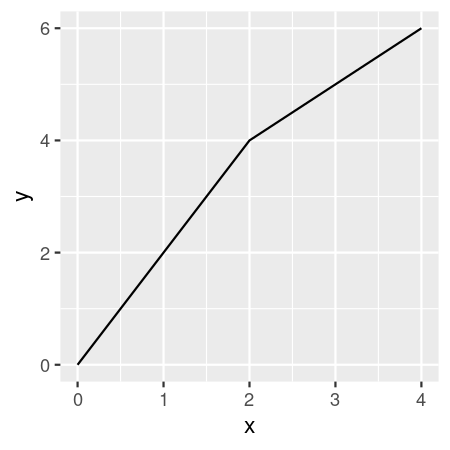

In [15]:
%%R -i r_from_pd -w 3 -h 3 --units in -r 150
# width: 3 in, hight: 3 in, resolution: 150 dpi
library(ggplot2)
ggplot(r_from_pd, aes(x=x, y=y)) + geom_line()


## Export from magic cells
To transfer r_df into normal cels it can be either saved as a csv file and imported again or exported and then converted into a pandas dataframe. 

#### Save as csv

In [16]:
%%R
write.csv(r_df,"r_df_magic.csv", row.names = FALSE)

In [17]:
r_df.from_csvfile("r_df_magic.csv")
p_df = pd.read_csv("r_df_magic.csv")

#### Export directly from R cell with -o

In [18]:
%%R -o r_df_magic
r_df_magic=r_df

In [19]:
type(r_df_magic)

pandas.core.frame.DataFrame